# Links:

- [Ridge Regression Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
- [Ridge Regression IBM](https://www.ibm.com/br-pt/think/topics/ridge-regression)

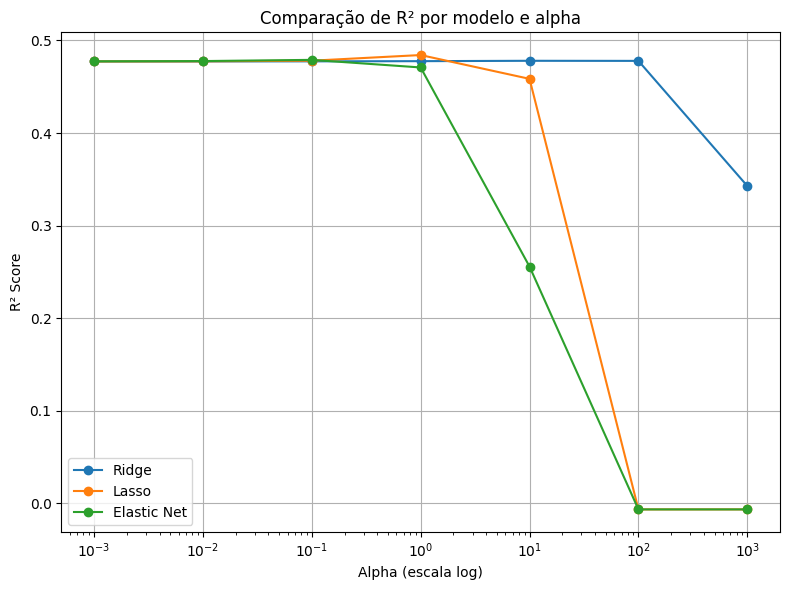

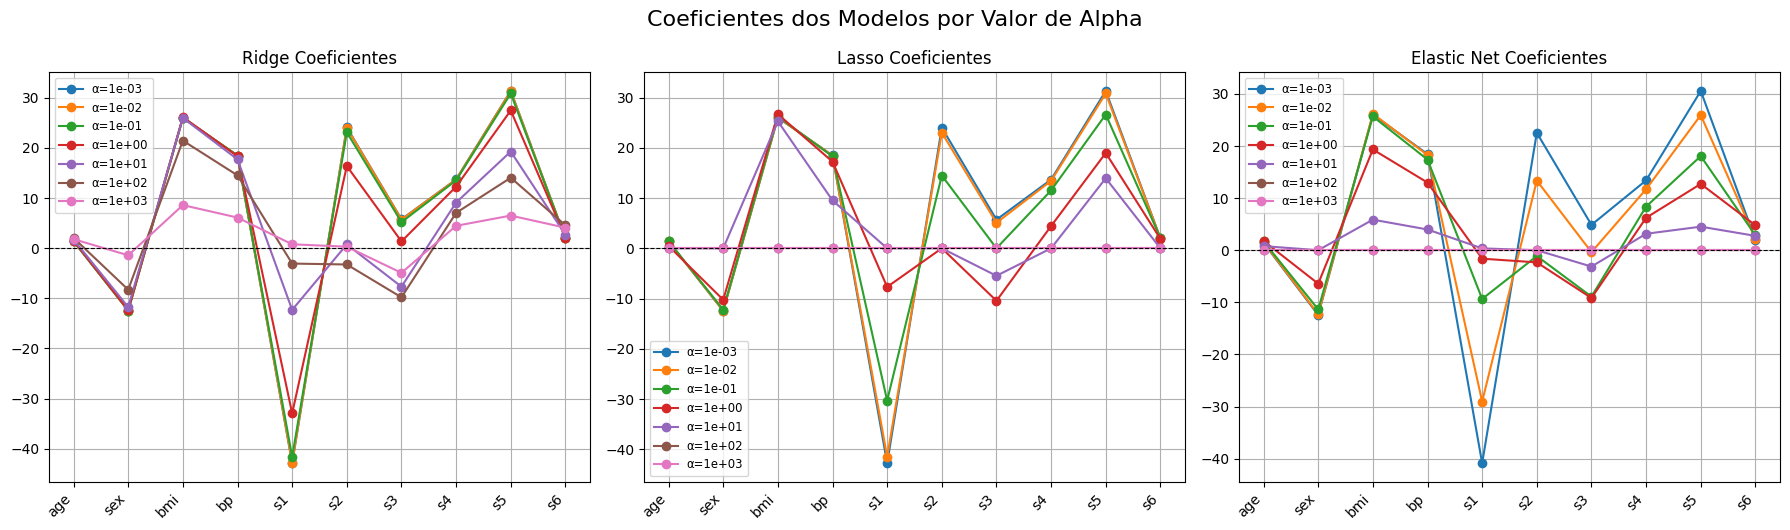

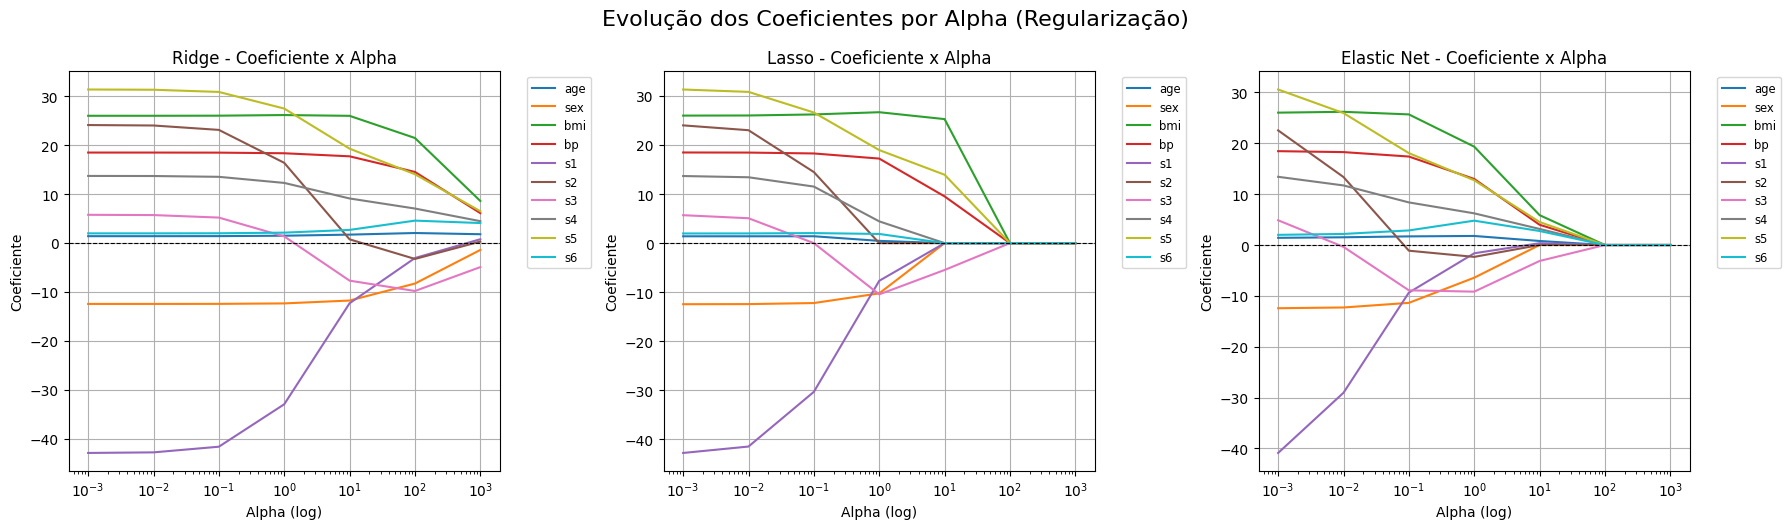

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


,Alpha,Modelo,R2 Score,MSE
0,0.001,Ridge,0.4773,2821.7473
1,0.010,Ridge,0.4773,2821.7143
2,0.100,Ridge,0.4774,2821.4116
3,1.000,Ridge,0.4776,2820.0244
4,10.000,Ridge,0.4780,2817.6557
5,100.000,Ridge,0.4779,2818.3081
6,1000.000,Ridge,0.3428,3547.9327
7,0.001,Lasso,0.4773,2821.6809
8,0.010,Lasso,0.4774,2821.0767
9,0.100,Lasso,0.4781,2817.1157


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet()
}

dataset = load_diabetes()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names


scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

alphas = np.logspace(-3, 3, 7)
results = []
coefs = defaultdict(list)

for model_name, model in models.items():
    for a in alphas:
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            "Alpha": a,
            "Modelo": model_name,
            "R2 Score": round(r2, 4),
            "MSE": round(mse, 4)
        })
        
        coefs[model_name].append(model.coef_)


plt.figure(figsize=(8, 6))
for model_name in models:
    xs = [r["Alpha"] for r in results if r["Modelo"] == model_name]
    ys = [r["R2 Score"] for r in results if r["Modelo"] == model_name]
    plt.plot(xs, ys, marker='o', label=model_name)

plt.xscale("log")
plt.xlabel("Alpha (escala log)")
plt.ylabel("R² Score")
plt.title("Comparação de R² por modelo e alpha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


n_features = X.shape[1]
fig, axs = plt.subplots(1, len(models), figsize=(18, 5))

for idx, (model_name, coef_list) in enumerate(coefs.items()):
    axs[idx].set_title(f"{model_name} Coeficientes")
    for i, alpha in enumerate(alphas):
        axs[idx].plot(range(n_features), coef_list[i], marker='o', label=f"α={alpha:.0e}")
    
    axs[idx].set_xticks(range(n_features))
    axs[idx].set_xticklabels(feature_names, rotation=45, ha='right')
    axs[idx].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axs[idx].legend(fontsize='small')
    axs[idx].grid(True)

plt.tight_layout()
plt.suptitle("Coeficientes dos Modelos por Valor de Alpha", fontsize=16, y=1.05)
plt.show()


fig, axs = plt.subplots(1, len(models), figsize=(18, 5))

for idx, (model_name, coef_list) in enumerate(coefs.items()):
    axs[idx].set_title(f"{model_name} - Coeficiente x Alpha")
    
    coef_array = np.array(coef_list)  # shape: (len(alphas), n_features)
    
    for feature_idx in range(n_features):
        axs[idx].plot(alphas, coef_array[:, feature_idx], label=feature_names[feature_idx])
    
    axs[idx].set_xscale("log")
    axs[idx].set_xlabel("Alpha (log)")
    axs[idx].set_ylabel("Coeficiente")
    axs[idx].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axs[idx].legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    axs[idx].grid(True)

plt.tight_layout()
plt.suptitle("Evolução dos Coeficientes por Alpha (Regularização)", fontsize=16, y=1.05)
plt.show()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["target"] = dataset.target

display(df)

df_results = pd.DataFrame(results)
display(df_results)